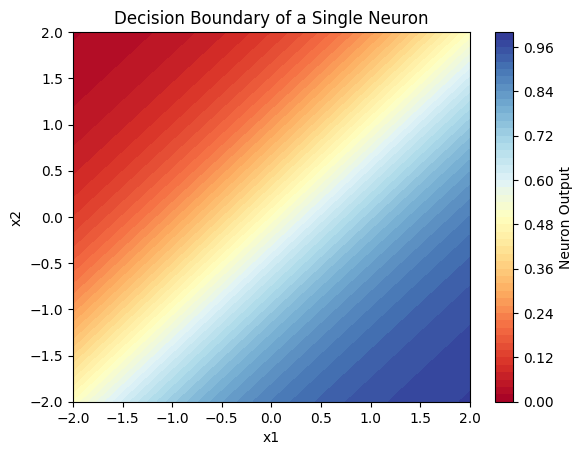

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

class SingleNeuron(nn.Module):
    def __init__(self, input_size):
        super(SingleNeuron, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Weighted sum: z = w * x + b
        self.activation = nn.Sigmoid()  # Activation function

    def forward(self, x):
        z = self.linear(x)  # Compute weighted sum
        y = self.activation(z)  # Apply activation function
        return y

# Create a single neuron with 2 inputs
neuron = SingleNeuron(input_size=2)

# Manually set weights and bias for demonstration
neuron.linear.weight.data = torch.tensor([[1.0, -1.0]])  # w1 = 1, w2 = -1
neuron.linear.bias.data = torch.tensor([0.0])  # b = 0

# Generate a grid of input values
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.stack([X1.ravel(), X2.ravel()], axis=1)

# Compute neuron outputs
with torch.no_grad():
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y = neuron(X_tensor).numpy().reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, y, levels=50, cmap="RdYlBu")
plt.colorbar(label="Neuron Output")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of a Single Neuron")
plt.show()